# PyTorch 에서 데이터 불러오기

- Pytorch 데이터 불러오기 기능의 핵심은 torch.utils.data.DataLoader 클래스다. <br>
- 데이터를 파이썬 iterable로써 접근할 수 있게 해주는 클래스다.<br>
- torch.utils.data.Dataset 클래스를 통해 PyTorch에 내장된 다양한 고품질 데이터셋을 이용할 수 있다. <br><br><br>
이번 레시피에서는 torchaudio.datasets.YESNO 데이터셋을 살펴보면서 PyTorch Dataset 에서 PyTorch DataLoader로 데이터를 효과적이고 효율적으로 불러오는 방법을 살펴본다.

## 초기 설정

In [1]:
pip install torchaudio

Note: you may need to restart the kernel to use updated packages.


## 단계
1. 데이터를 불러오는데 필요한 라이브러리 import
2. 데이터 접근
3. 데이터 불러오기
4. 데이터 순회
5. [선택사항] 데이터 시각화

### 1. 데이터를 불러오는데 필요한 라이브러리 import

In [2]:
import torch
import torchaudio

### 2. 데이터에 접근
- torchaudio의 YesNo 데이터셋은 한 사람이 히브리어로 yes 혹은 no를 녹음한 오디오 클립 60개로 구성 <br>
- 오디오 클립 각각의 길이는 단어 8개

In [10]:
torchaudio.datasets.YESNO(
    root,
    url='http://www.openslr.org/resources/1/waves_yesno.tar.gz',
    folder_in_archive='waves_yesno',
    download=False,
    transform=None,
    target_transform=None)

각각의 데이터 항목(item)은 튜플 형태(waveform: 파형, sample_rate: 샘플 속도, labels: 라벨)를 갖는다.<br><br>
YesNo 데이터셋을 불러올 때 root 매개변수는 꼭 지정해줘야 한다. root는 training 및 test 데이터셋이 존재하는 위치를 가르켜야 한다.<br>
그 외의 매개변수는 선택 사항이다. 아래와 같은 매개변수도 사용 가능하다.<br>
- **download** : 참인 경우, 데이터셋 파일을 인터넷에서 다운받고 root폴더에 저장. 파일이 이미 존재하면 다시 다운받지 않는다.
- **transform** : 데이터를 변환하여 학습에 사용할 수 있도록 이어붙이고 비정규화된 형태로 불러올 수 있다. 라이브러리마다 다양한 transformation을 지원하고 있으며, 앞으로도 추가될 예정이다.
- **target_transform** : 타겟 데이터를 변환하기 위한 함수 혹은 transform

In [3]:
# YesNo 안에 각각의 데이터 항목은 튜플 형태 (파형, 샘플 속도, 라벨)를 가지며,
# 이때 labels는 0(no)과 1(yes)을 담은 리스트 형태로 되어있다.
yesno_data = torchaudio.datasets.YESNO('./', download=True)

# 실제 데이터에 접근해서 yesno_data의 형태를 확인합니다.
n = 3
waveform, sample_rate, labels = yesno_data[n]
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

Waveform: tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.8311e-04,
          4.2725e-04,  6.7139e-04]])
Sample rate: 8000
Labels: [0, 0, 1, 0, 0, 0, 1, 0]


### 3. 데이터 불러오기
데이터셋에 성공적으로 접근했으니, 이제 데이터셋을 torch.utils.data.DataLoader로 넘겨준다. <br>
DataLoader는 데이터셋을 sampler와 조합시켜 데이터셋을 순회할 수 있는 iterable을 만들어준다.

In [5]:
data_loader = torch.utils.data.DataLoader(yesno_data,
                                          batch_size=1,
                                          shuffle=True)

### 4. 데이터 순회
data_loader를 이용해서 데이터를 순회할 수 있다. 모델을 학습하려면 이처럼 데이터를 순회할 수 있어야한다.

In [6]:
for data in data_loader:
    print("Data: ", data)
    print("Waveform: {}\nSample rate: {}\nLabels: {}".format(data[0], data[1], data[2]))
    break

Data:  [tensor([[[3.0518e-05, 6.1035e-05, 3.0518e-05,  ..., 2.1362e-03,
          2.0142e-03, 2.2278e-03]]]), tensor([8000]), [tensor([1]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([1]), tensor([1])]]
Waveform: tensor([[[3.0518e-05, 6.1035e-05, 3.0518e-05,  ..., 2.1362e-03,
          2.0142e-03, 2.2278e-03]]])
Sample rate: tensor([8000])
Labels: [tensor([1]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([1]), tensor([1])]


### 5. 데이터 시각화

[[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 2.1362305e-03
  2.0141602e-03 2.2277832e-03]]


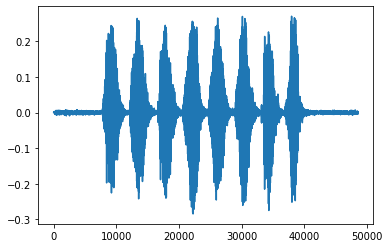

In [22]:
import matplotlib.pyplot as plt

print(data[0][0].numpy())

plt.figure()
plt.plot(waveform.t().numpy())

In [19]:
waveform.t().numpy()[0]

array([3.0517578e-05], dtype=float32)